In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [212]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [214]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

Checking and Handling Null values

In [215]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

We can see many columns have null values. We will drop the columns with maximum null values which are: other_fuel1,other_fuel2,other_fuel3,owner,wepp_id,generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh.

In [216]:
df.drop(['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','estimated_generation_gwh','generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)

In [217]:
df.shape

(907, 19)

In [218]:
df.isna().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

<AxesSubplot:>

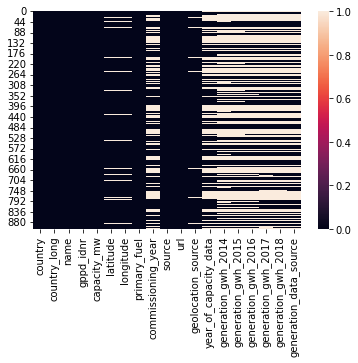

In [219]:
sns.heatmap(df.isnull())

In [220]:
df['generation_data_source']

0                                NaN
1                                NaN
2                                NaN
3      Central Electricity Authority
4      Central Electricity Authority
                   ...              
902    Central Electricity Authority
903                              NaN
904                              NaN
905                              NaN
906                              NaN
Name: generation_data_source, Length: 907, dtype: object

In [221]:
pd.get_dummies(df["geolocation_source"]).sum()

Industry About                          119
National Renewable Energy Laboratory      4
WRI                                     765
dtype: int64

In [222]:
pd.get_dummies(df["primary_fuel"]).sum()

Biomass     50
Coal       258
Gas         69
Hydro      251
Nuclear      9
Oil         20
Solar      127
Wind       123
dtype: int64

In [223]:
pd.get_dummies(df["year_of_capacity_data"]).sum()

2019.0    519
dtype: int64

In [224]:
Imp = SimpleImputer(missing_values=np.nan,strategy='mean')
Imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

df['year_of_capacity_data'] = Imp.fit_transform(df['year_of_capacity_data'].values.reshape(-1,1))
df['geolocation_source'] = Imp_mode.fit_transform(df['geolocation_source'].values.reshape(-1,1))

In [225]:
df['generation_gwh_2014'] = Imp.fit_transform(df['generation_gwh_2014'].values.reshape(-1,1))
df['generation_gwh_2015'] = Imp.fit_transform(df['generation_gwh_2015'].values.reshape(-1,1))
df['generation_gwh_2016'] = Imp.fit_transform(df['generation_gwh_2016'].values.reshape(-1,1))
df['generation_gwh_2017'] = Imp.fit_transform(df['generation_gwh_2017'].values.reshape(-1,1))
df['generation_gwh_2018'] = Imp.fit_transform(df['generation_gwh_2018'].values.reshape(-1,1))
df['commissioning_year'] = Imp_mode.fit_transform(df['commissioning_year'].values.reshape(-1,1))
df['generation_data_source'] = Imp_mode.fit_transform(df['generation_data_source'].values.reshape(-1,1))

In [226]:
df.shape

(907, 19)

In [227]:
df.isnull().sum()

country                    0
country_long               0
name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year         0
source                     0
url                        0
geolocation_source         0
year_of_capacity_data      0
generation_gwh_2014        0
generation_gwh_2015        0
generation_gwh_2016        0
generation_gwh_2017        0
generation_gwh_2018        0
generation_data_source     0
dtype: int64

Lattitude/longitude are location specific hence we cannot fill null values with mean/median values. Hence I am dropping rows.

In [228]:
df.dropna(inplace=True)

In [229]:
df.shape

(861, 19)

Percentage data loss

In [230]:
data_loss = ((907-861)/907)*100
data_loss

5.071664829106946

In [231]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [232]:
pd.get_dummies(df['country']).sum()

IND    861
dtype: int64

In [233]:
pd.get_dummies(df['country_long']).sum()

India    861
dtype: int64

In [234]:
pd.get_dummies(df['generation_data_source']).sum()

Central Electricity Authority    861
dtype: int64

In [235]:
pd.get_dummies(df['year_of_capacity_data']).sum()

2019.0    861
dtype: int64

As generation_data_source is constant - 'Central Electricity Authority' and data belongs to only one country i.e. India, country and country_long holds constant value hence we will drop the columns.

In [236]:
df.drop(['country','country_long','generation_data_source','year_of_capacity_data'],axis=1,inplace=True)

In [237]:
df.shape

(861, 15)

We can observe all null values are eleminated and new shape of dataset is 861*16.

Using LabelEncoder for categorical data

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 861 entries, 0 to 906
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 861 non-null    object 
 1   gppd_idnr            861 non-null    object 
 2   capacity_mw          861 non-null    float64
 3   latitude             861 non-null    float64
 4   longitude            861 non-null    float64
 5   primary_fuel         861 non-null    object 
 6   commissioning_year   861 non-null    float64
 7   source               861 non-null    object 
 8   url                  861 non-null    object 
 9   geolocation_source   861 non-null    object 
 10  generation_gwh_2014  861 non-null    float64
 11  generation_gwh_2015  861 non-null    float64
 12  generation_gwh_2016  861 non-null    float64
 13  generation_gwh_2017  861 non-null    float64
 14  generation_gwh_2018  861 non-null    float64
dtypes: float64(9), object(6)
memory usage: 1

In [239]:
df["name"]=le.fit_transform(df["name"])
df["name"].value_counts()

0      1
566    1
568    1
569    1
570    1
      ..
290    1
291    1
292    1
293    1
860    1
Name: name, Length: 861, dtype: int64

In [240]:
df["gppd_idnr"]=le.fit_transform(df["gppd_idnr"])
df["gppd_idnr"].value_counts()

629    1
306    1
308    1
309    1
476    1
      ..
847    1
668    1
651    1
788    1
831    1
Name: gppd_idnr, Length: 861, dtype: int64

In [241]:
df["primary_fuel"]=le.fit_transform(df["primary_fuel"])
pd.get_dummies(df["primary_fuel"]).sum()

0     50
1    253
2     68
3    233
4      9
5     17
6    123
7    108
dtype: int64

In [242]:
df["source"]=le.fit_transform(df["source"])
df["source"].value_counts()

22     492
21     109
84      10
110      6
109      4
      ... 
56       1
46       1
164      1
187      1
189      1
Name: source, Length: 191, dtype: int64

In [243]:
df["url"]=le.fit_transform(df["url"])
df["url"].value_counts()

58     492
100      7
129      6
39       5
42       4
      ... 
271      1
68       1
213      1
198      1
234      1
Name: url, Length: 288, dtype: int64

In [244]:
df["geolocation_source"]=le.fit_transform(df["geolocation_source"])
df["geolocation_source"].value_counts()

2    738
0    119
1      4
Name: geolocation_source, dtype: int64

array([[<AxesSubplot:title={'center':'name'}>,
        <AxesSubplot:title={'center':'gppd_idnr'}>,
        <AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'primary_fuel'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'source'}>,
        <AxesSubplot:title={'center':'url'}>,
        <AxesSubplot:title={'center':'geolocation_source'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2016'}>,
        <AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:title={'center':'generation_gwh_2018'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSu

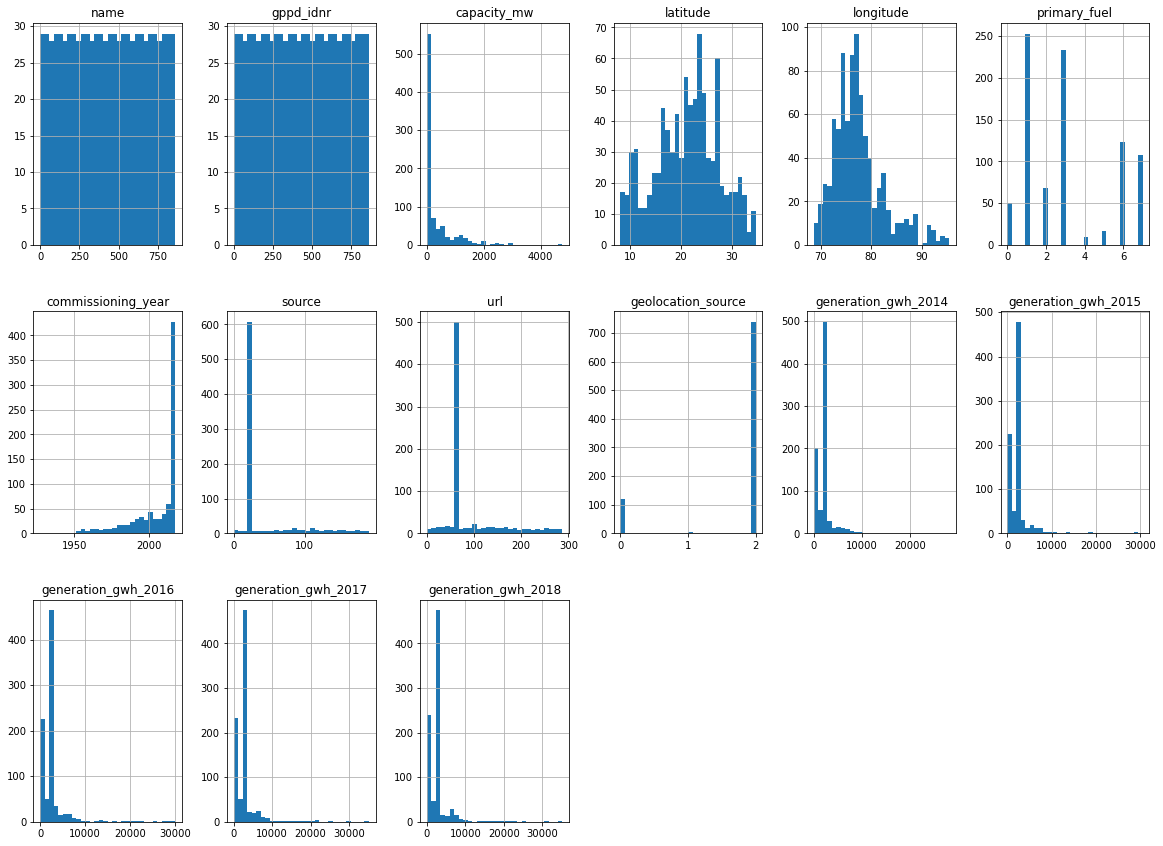

In [246]:
df.hist(figsize=(20,20),grid=True,layout=(4,6),bins=30)

In [247]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'source', 'url',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

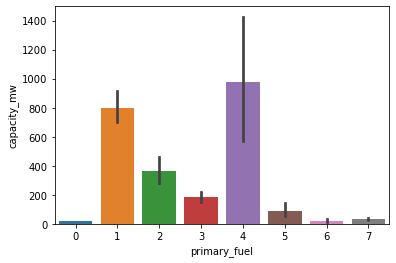

In [163]:
sns.barplot(x='primary_fuel', y='capacity_mw',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

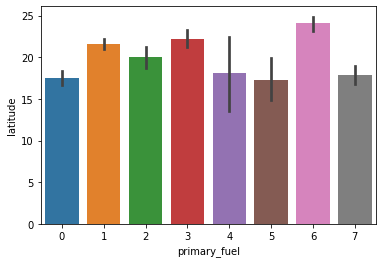

In [164]:
sns.barplot(x='primary_fuel', y='latitude',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='longitude'>

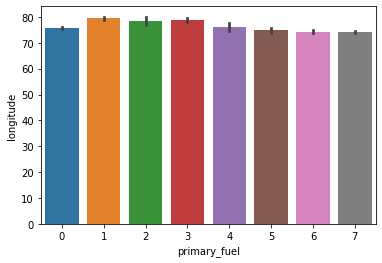

In [165]:
sns.barplot(x='primary_fuel', y='longitude',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='source'>

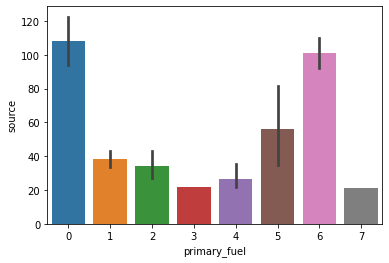

In [249]:
sns.barplot(x='primary_fuel', y='source',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='url'>

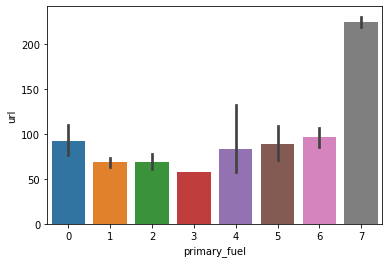

In [250]:
sns.barplot(x='primary_fuel', y='url',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='url'>

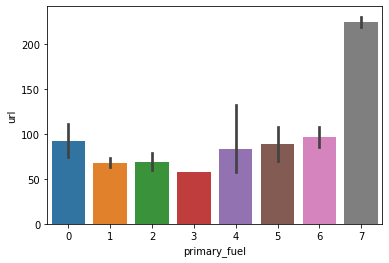

In [248]:
sns.barplot(x='primary_fuel', y='url',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

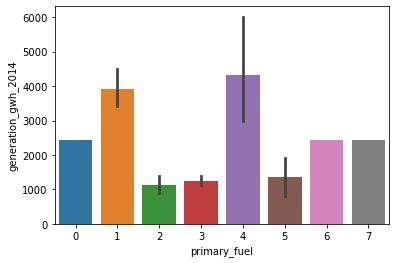

In [251]:
sns.barplot(x='primary_fuel', y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

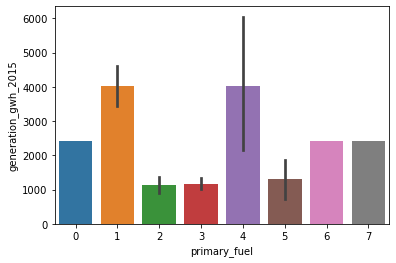

In [252]:
sns.barplot(x='primary_fuel', y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

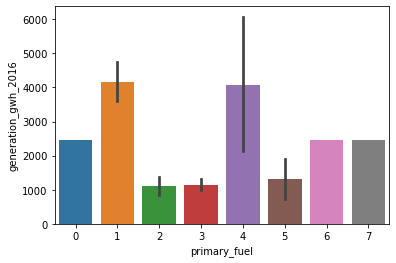

In [253]:
sns.barplot(x='primary_fuel', y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

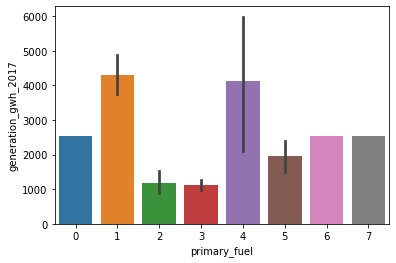

In [254]:
sns.barplot(x='primary_fuel', y='generation_gwh_2017',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

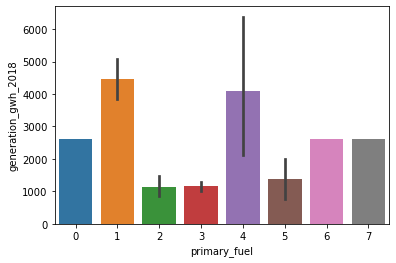

In [255]:
sns.barplot(x='primary_fuel', y='generation_gwh_2018',data=df)

In [256]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'source', 'url',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='capacity_mw'>

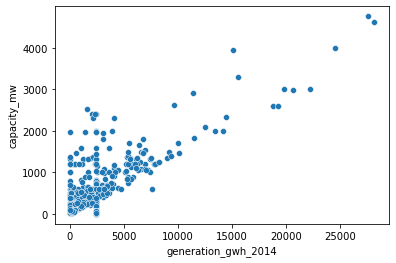

In [260]:
sns.scatterplot(x='generation_gwh_2014', y='capacity_mw',data=df)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='capacity_mw'>

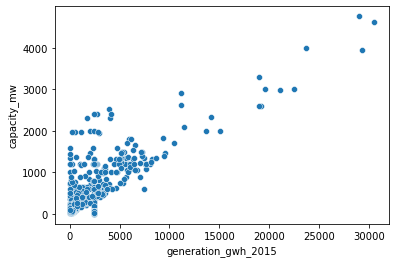

In [261]:
sns.scatterplot(x='generation_gwh_2015', y='capacity_mw',data=df)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='capacity_mw'>

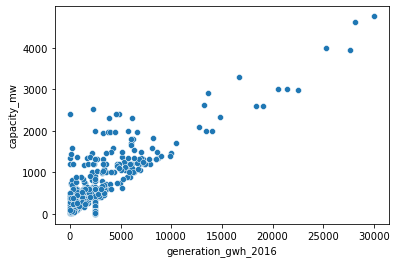

In [262]:
sns.scatterplot(x='generation_gwh_2016', y='capacity_mw',data=df)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='capacity_mw'>

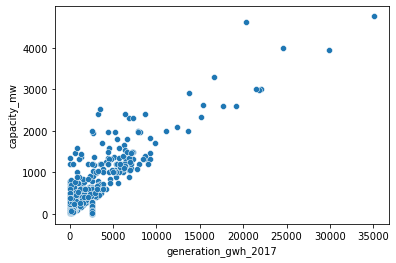

In [263]:
sns.scatterplot(x='generation_gwh_2017', y='capacity_mw',data=df)

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='capacity_mw'>

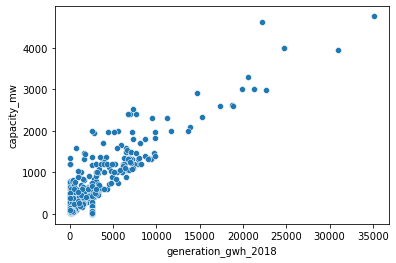

In [259]:
sns.scatterplot(x='generation_gwh_2018', y='capacity_mw',data=df)

In [264]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'source', 'url',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

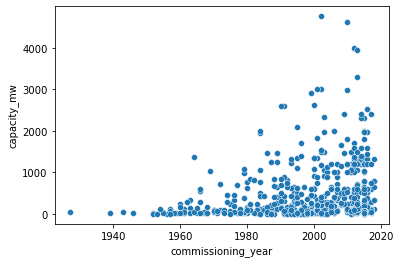

In [265]:
sns.scatterplot(x='commissioning_year', y='capacity_mw',data=df)

<AxesSubplot:xlabel='latitude', ylabel='capacity_mw'>

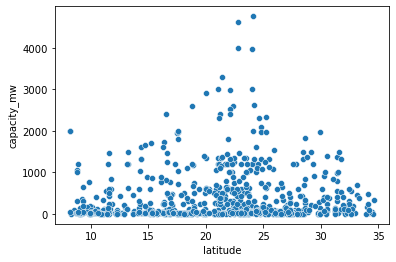

In [266]:
sns.scatterplot(x='latitude', y='capacity_mw',data=df)

In [267]:
df.describe()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,430.000000,430.000000,340.382051,21.197918,77.464907,3.139373,2004.637631,44.628339,91.088269,1.718931,2447.873244,2448.582212,2490.031658,2576.521363,2630.157225
std,248.693587,248.693587,601.830519,6.239612,4.939316,2.268407,15.619864,45.333635,65.381113,0.692133,2728.827332,2926.796630,2945.039372,2987.234820,3099.230838
min,0.000000,0.000000,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,215.000000,215.000000,18.000000,16.773900,74.256200,1.000000,1998.000000,22.000000,58.000000,2.000000,1153.421000,843.747000,823.297501,858.734750,798.381000
50%,430.000000,430.000000,60.000000,21.780000,76.719500,3.000000,2014.000000,22.000000,58.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
75%,645.000000,645.000000,412.020000,25.512400,79.440800,6.000000,2015.000000,37.000000,108.000000,2.000000,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
max,860.000000,860.000000,4760.000000,34.649000,95.408000,7.000000,2018.000000,190.000000,287.000000,2.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Key Observations: 1) Data has skewness as for few columns data Mean is not equal to 50%. 2) For few columns there is slight gap between 75% and max values hence possibility of outliers.

Checking Correlation

In [268]:
df.corr()['primary_fuel'].sort_values()

geolocation_source    -0.512705
capacity_mw           -0.378447
longitude             -0.359060
generation_gwh_2018   -0.143576
generation_gwh_2017   -0.138484
generation_gwh_2016   -0.136132
generation_gwh_2015   -0.129800
generation_gwh_2014   -0.129149
latitude              -0.010530
name                   0.028894
source                 0.060286
commissioning_year     0.155931
url                    0.567925
gppd_idnr              0.600834
primary_fuel           1.000000
Name: primary_fuel, dtype: float64

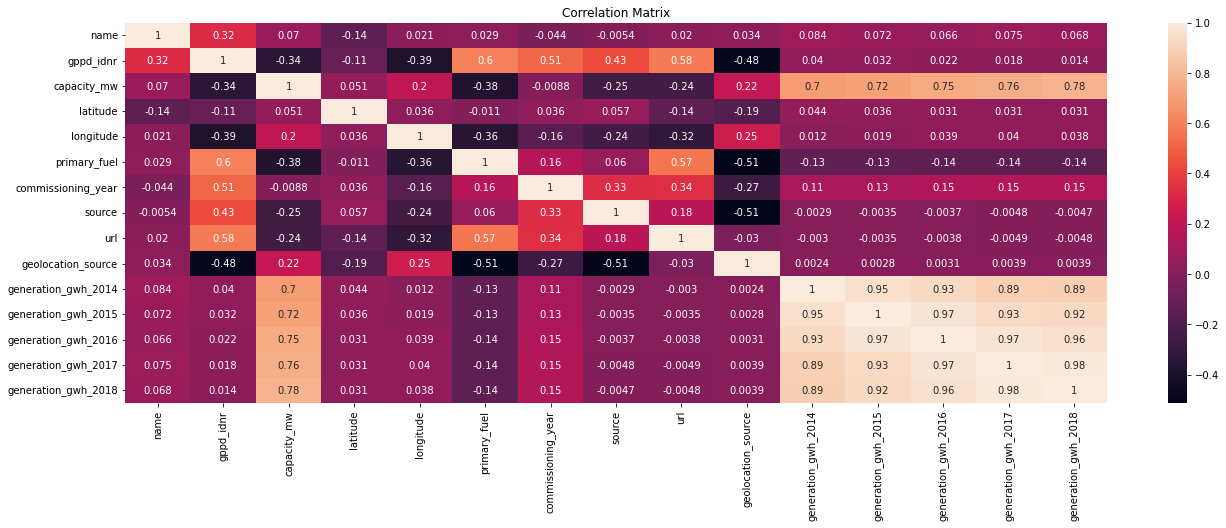

In [269]:
corr_mat = df.corr()
plt.figure(figsize=[22,7])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Correlation_matrix.jpg')
plt.show()

Checking multicollinearity

In [271]:
x1 = df.drop(['primary_fuel'],axis=1)
y1 = df['primary_fuel']

In [273]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x1)
X_scaled

array([[-1.7300403 ,  0.80064656, -0.56175024, ..., -0.00750674,
        -0.00963392, -0.00947661],
       [-1.72601695,  0.24944767, -0.40297546, ..., -0.00750674,
        -0.00963392, -0.00947661],
       [-1.7219936 ,  1.56105962, -0.50073417, ..., -0.00750674,
        -0.00963392, -0.00947661],
       ...,
       [ 1.7219936 ,  1.67371341, -0.52351129, ..., -0.00750674,
        -0.00963392, -0.00947661],
       [ 1.72601695,  0.32991466, -0.4329016 , ..., -0.00750674,
        -0.00963392, -0.00947661],
       [ 1.7300403 ,  1.61336316, -0.53847435, ..., -0.00750674,
        -0.00963392, -0.00947661]])

In [274]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = x1.columns

vif

,vif,Features
0,1.576280,name
1,4.717292,gppd_idnr
2,4.432361,capacity_mw
3,1.113181,latitude
4,1.255750,longitude
5,1.678498,commissioning_year
6,1.537172,source
7,1.962947,url
8,2.008678,geolocation_source
9,11.347109,generation_gwh_2014


Checking Skewness

In [276]:
df.skew()

name                   0.000000
gppd_idnr              0.000000
capacity_mw            3.037191
latitude              -0.145866
longitude              1.112646
primary_fuel           0.507576
commissioning_year    -1.683585
source                 1.778807
url                    1.516283
geolocation_source    -2.072165
generation_gwh_2014    4.930254
generation_gwh_2015    5.253370
generation_gwh_2016    4.965294
generation_gwh_2017    5.014455
generation_gwh_2018    4.843057
dtype: float64

In [277]:
columns = ('capacity_mw','longitude','commissioning_year','source','url','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018')

for col in columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [279]:
df.skew()

name                   0.000000
gppd_idnr              0.000000
capacity_mw            0.093140
latitude              -0.145866
longitude              0.916519
primary_fuel           0.507576
commissioning_year    -1.683585
source                 0.813021
url                   -0.737448
geolocation_source    -2.072165
generation_gwh_2014   -2.544724
generation_gwh_2015   -2.279381
generation_gwh_2016   -2.235670
generation_gwh_2017   -2.283786
generation_gwh_2018   -2.279260
dtype: float64

We can observe skewness has been reduced and lies in rage between 0.09 to -2.5

Checking outliers

name                      AxesSubplot(0.125,0.749828;0.227941x0.130172)
gppd_idnr              AxesSubplot(0.398529,0.749828;0.227941x0.130172)
capacity_mw            AxesSubplot(0.672059,0.749828;0.227941x0.130172)
latitude                  AxesSubplot(0.125,0.593621;0.227941x0.130172)
longitude              AxesSubplot(0.398529,0.593621;0.227941x0.130172)
primary_fuel           AxesSubplot(0.672059,0.593621;0.227941x0.130172)
commissioning_year        AxesSubplot(0.125,0.437414;0.227941x0.130172)
source                 AxesSubplot(0.398529,0.437414;0.227941x0.130172)
url                    AxesSubplot(0.672059,0.437414;0.227941x0.130172)
geolocation_source        AxesSubplot(0.125,0.281207;0.227941x0.130172)
generation_gwh_2014    AxesSubplot(0.398529,0.281207;0.227941x0.130172)
generation_gwh_2015    AxesSubplot(0.672059,0.281207;0.227941x0.130172)
generation_gwh_2016          AxesSubplot(0.125,0.125;0.227941x0.130172)
generation_gwh_2017       AxesSubplot(0.398529,0.125;0.227941x0.

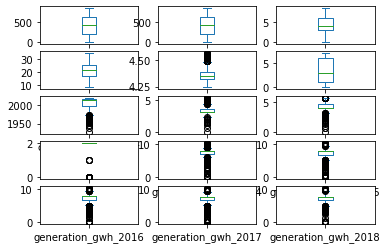

In [281]:
df.plot(kind='box',subplots=True,layout=(5,3))

We can observe outliers present in few columns

In [282]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 22,  22,  43,  55,  55,  60,  60,  80,  80,  82,  89,  91,  95,
         99,  99, 100, 100, 100, 106, 154, 154, 154, 154, 159, 162, 162,
        162, 162, 176, 195, 195, 195, 195, 195, 204, 205, 212, 213, 213,
        213, 213, 214, 214, 214, 214, 214, 227, 227, 243, 243, 247, 248,
        248, 264, 264, 264, 266, 266, 266, 301, 301, 319, 322, 322, 328,
        332, 337, 339, 344, 344, 344, 344, 357, 371, 389, 401, 403, 410,
        424, 428, 434, 440, 440, 447, 449, 456, 456, 456, 456, 456, 457,
        460, 486, 494, 500, 500, 500, 500, 500, 514, 519, 519, 520, 520,
        535, 535, 537, 541, 541, 541, 541, 541, 545, 549, 555, 557, 557,
        557, 557, 561, 562, 573, 573, 593, 600, 600, 600, 610, 616, 618,
        618, 618, 622, 622, 622, 622, 622, 631, 646, 651, 652, 652, 652,
        652, 653, 653, 654, 659, 668, 674, 677, 678, 689, 694, 709, 709,
        710, 710, 710, 740, 748, 748, 748, 748, 748, 752, 764, 766, 766,
        770, 770, 770, 772, 774, 774, 774, 774, 779

In [283]:
df = df[(z<3).all(axis=1)]
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,629,1.252763,28.1839,4.307313,6,2011.0,4.700480,4.844187,1,7.796808,7.795328,7.811543,7.843362,7.863960
1,1,492,4.595120,24.7663,4.325575,1,2015.0,5.164786,5.135798,2,7.796808,7.795328,7.811543,7.843362,7.863960
2,2,818,3.693867,21.9038,4.253813,7,2015.0,3.091042,5.283204,2,7.796808,7.795328,7.811543,7.843362,7.863960
3,3,0,4.912655,23.8712,4.525696,2,2004.0,3.135494,4.077537,2,6.427765,6.739037,6.787850,6.499448,6.441328
4,4,1,7.496097,21.9603,4.423757,1,2015.0,3.135494,4.077537,2,8.018477,8.685647,8.739376,8.591666,8.892886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,854,606,2.833213,17.1653,4.320757,0,2015.0,5.247024,3.688879,2,7.796808,7.795328,7.811543,7.843362,7.863960
903,857,787,1.386294,12.8932,4.371539,6,2015.0,4.356709,3.135494,0,7.796808,7.795328,7.811543,7.843362,7.863960
904,858,846,3.277145,15.2758,4.338350,7,2015.0,3.091042,5.509388,2,7.796808,7.795328,7.811543,7.843362,7.863960
905,859,512,4.394449,24.3500,4.314118,1,2015.0,4.094345,4.418841,2,7.796808,7.795328,7.811543,7.843362,7.863960


In [284]:
df.shape

(758, 15)

Percentage data loss

In [285]:
Data_loss=((861-758)/861)*100
Data_loss

11.962833914053427

Classification approach for Primary_Fuel prediction.

In [303]:
model = [DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]

for i in range(0,50):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.33,random_state=i)
    for models in model:
        models.fit(x_train,y_train)
        prediction = models.predict(x_test)
        accu_Score = accuracy_score(y_test,prediction)
        print("Accuracy score for random state: ", i, " is ",accu_Score)
print()
print()
print()
print()
print()

Accuracy score for random state:  0  is  0.7719298245614035
Accuracy score for random state:  0  is  0.45614035087719296
Accuracy score for random state:  0  is  0.8280701754385965
Accuracy score for random state:  0  is  0.7473684210526316
Accuracy score for random state:  1  is  0.8175438596491228
Accuracy score for random state:  1  is  0.4421052631578947
Accuracy score for random state:  1  is  0.8491228070175438
Accuracy score for random state:  1  is  0.7298245614035088
Accuracy score for random state:  2  is  0.7614035087719299
Accuracy score for random state:  2  is  0.4421052631578947
Accuracy score for random state:  2  is  0.8350877192982457
Accuracy score for random state:  2  is  0.712280701754386
Accuracy score for random state:  3  is  0.8210526315789474
Accuracy score for random state:  3  is  0.4070175438596491
Accuracy score for random state:  3  is  0.8596491228070176
Accuracy score for random state:  3  is  0.7228070175438597
Accuracy score for random state:  4  is 

We can observe the highest accuracy Score:0.8982456140350877 is at random state 22 and for model: RandomForestClassifier.

Best Parameter

In [304]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.33,random_state=22)
rfc = RandomForestClassifier()
parameters={'max_features': ['auto','sqrt','log2']}
gridsearch =GridSearchCV(rfc,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'max_features': 'auto'}

In [305]:
Rfc = RandomForestClassifier(max_features='auto')
Rfc.fit(x_train,y_train)
predictions = Rfc.predict(x_test)
AccScore = accuracy_score(y_test,predictions)
print("Accuracy Score is: ",AccScore)

Accuracy Score is:  0.8350877192982457


Accuracy score is 83% with RandomForestClassifier

In [291]:
score = cross_val_score(Rfc,x1,y1,cv=5)

In [306]:
print("Croos Val Score: ",score)
print("Mean Score: ",score.mean())
print("std Score: ",score.std())

Croos Val Score:  [0.84971098 0.86046512 0.87790698 0.85465116 0.83139535]
Mean Score:  0.8548259174620245
std Score:  0.01509781775093175


Regression Approach for capacity_mw prediction

In [293]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'source', 'url',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [294]:
x = df.drop(['capacity_mw'],axis=1)
y = df['capacity_mw']

In [295]:
Regression_scaler = StandardScaler()
X1_scaled = Regression_scaler.fit_transform(x)
X1_scaled

array([[-1.70027327,  0.72362146,  1.1064443 , ...,  0.32659182,
         0.33500882,  0.32851239],
       [-1.69628138,  0.18287239,  0.55933095, ...,  0.32659182,
         0.33500882,  0.32851239],
       [-1.69228948,  1.46961835,  0.10108189, ...,  0.32659182,
         0.33500882,  0.32851239],
       ...,
       [ 1.72477234,  1.58013641, -0.95997479, ...,  0.32659182,
         0.33500882,  0.32851239],
       [ 1.72876424,  0.26181386,  0.49268673, ...,  0.32659182,
         0.33500882,  0.32851239],
       [ 1.73275613,  1.5209303 , -1.81506352, ...,  0.32659182,
         0.33500882,  0.32851239]])

In [296]:
vif_Reg = pd.DataFrame()
vif_Reg['vif'] = [variance_inflation_factor(X1_scaled,i) for i in range(X1_scaled.shape[1])]
vif_Reg['Features'] = x.columns

vif_Reg

,vif,Features
0,1.468319,name
1,4.752472,gppd_idnr
2,1.165845,latitude
3,1.333398,longitude
4,3.696942,primary_fuel
5,1.947731,commissioning_year
6,2.144877,source
7,2.171290,url
8,3.012796,geolocation_source
9,4.131551,generation_gwh_2014


Regression models

In [300]:
model = [DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression(),SVR()]

for i in range(0,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=i)
    for models in model:
        models.fit(x_train,y_train)
        prediction = models.predict(x_test)
        R2Score = r2_score(y_test,prediction)
        print("R2 score for random state: ", i, " is ",R2Score)
print()
print()
print()
print()

R2 score for random state:  0  is  0.7470147578335934
R2 score for random state:  0  is  0.3508392628835777
R2 score for random state:  0  is  0.48487850181426706
R2 score for random state:  0  is  0.33912657320496753
R2 score for random state:  1  is  0.7105782926801046
R2 score for random state:  1  is  0.397918761196312
R2 score for random state:  1  is  0.4762057348662897
R2 score for random state:  1  is  0.357342683321934
R2 score for random state:  2  is  0.6708197882259644
R2 score for random state:  2  is  0.43546838589387515
R2 score for random state:  2  is  0.5662595097352796
R2 score for random state:  2  is  0.4143367539381365
R2 score for random state:  3  is  0.74688162174289
R2 score for random state:  3  is  0.33925583202293474
R2 score for random state:  3  is  0.46704670486769817
R2 score for random state:  3  is  0.3382050294228771
R2 score for random state:  4  is  0.7467901609813521
R2 score for random state:  4  is  0.34893262397282443
R2 score for random state:

We can observe the highest R2 Score:0.7650638760450326 is at random state 9 and for model: DecisionTreeRegressor.

Best Parameter

In [301]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=9)
dtr = DecisionTreeRegressor()
parameters={'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2']}
gridsearch =GridSearchCV(dtr,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'criterion': 'mae', 'max_features': 'log2'}

In [307]:
DecTree = DecisionTreeRegressor(criterion='mae',max_features='log2')
DecTree.fit(x_train,y_train)
predictions = DecTree.predict(x_test)
r2Score = r2_score(y_test,predictions)
print("R2 Score is: ",r2Score)

R2 Score is:  0.7865308051154186


Regression Metrics

In [308]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error: ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error: ",mean_squared_error(y_test,predictions))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,predictions)))

Mean Absolute Error:  0.4631578947368421
Mean Squared Error:  1.0456140350877192
Root Mean Squared Error:  1.022552705286001
